# Capítulo 3: MNIST

Esse capítulo trata da tarefa de Classificação. O conjunto de dados utilizados é uma série de imagens em formato de array. Essas imagens são algarismos escritos à mão, e o desafio é treinar um algoritmo que seja capaz de identificar qual numeral está na imagem.

Esse conjunto de dados é como o "Hello World" do Aprendizado de Máquina, e assim como o conjunto de flores Iris, ele está disponível pela própria Scikit-Learn:

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, parser='auto')

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Os conjuntos carregados pela Scikit-Learn tem uma estrutura similar a um dicionário

In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
print('X:', type(X), '  shape:', X.shape)   # matriz 70000 x 748
print('y:', type(y), '    shape:', y.shape) # vetor 70000

X: <class 'pandas.core.frame.DataFrame'>   shape: (70000, 784)
y: <class 'pandas.core.series.Series'>     shape: (70000,)


Temos 70.000 imagens de 748 pixels em sequência. Essas imagens tem um formato 28 x 28 pixels, e é preto e branco. Dessa forma, cada pixel possui apenas um valor que vai de 0 a 255 (branco a preto).

_Nota: Se houvesse cor, cada pixel teria 3 valores, formando o RGB_

Vamos mostrar um algarismo:

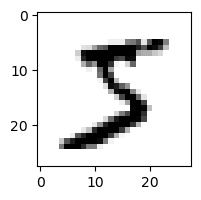

In [7]:
import matplotlib.pyplot as plt

some_digit = X.iloc[0]

def plot_some_digit(some_digit=some_digit):
    some_digit_image = some_digit.values.reshape(28, 28)
    plt.figure(figsize=(2,2))
    plt.imshow(some_digit_image, cmap='binary')
    plt.show()
    
plot_some_digit()

In [8]:
def plot_mnist(nrows=5, ncols=5, start=0):
    
    # showing labels
    
    for i in range(nrows*ncols):
        if i % ncols == 0: print()
        print(y[i+start], end=' ')

    # showing data
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols)

    for i in range(nrows*ncols):
        some_digit = X.iloc[i+start]
        some_digit_image = some_digit.values.reshape(28, 28)

        row, col = i//ncols, i%ncols

        ax[row, col].imshow(some_digit_image, cmap='binary')
        ax[row, col].axis('off')
        plt.subplots_adjust(right=1.5, top=1.5)


3 9 5 8 5 
7 6 1 1 3 
1 7 5 5 5 
2 5 8 7 0 
9 7 7 5 0 

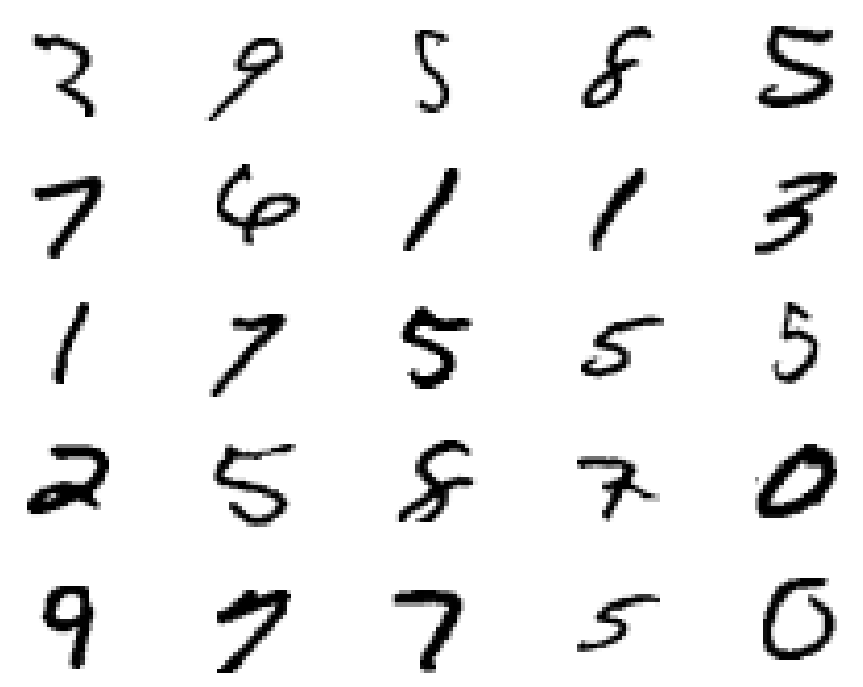

In [9]:
plot_mnist(nrows=5, ncols=5, start=500)

In [10]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 70000 entries, 0 to 69999
Series name: class
Non-Null Count  Dtype   
--------------  -----   
70000 non-null  category
dtypes: category(1)
memory usage: 68.9 KB


Veja que o tipo da coluna alvo é categórica, isto é, string. Vamos converter para numérica:

In [11]:
import numpy as np
y = y.astype(np.uint8)

In [12]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 70000 entries, 0 to 69999
Series name: class
Non-Null Count  Dtype
--------------  -----
70000 non-null  uint8
dtypes: uint8(1)
memory usage: 68.5 KB


### Separe o conjunto de teste e treinamento

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Treinando um Classificador Binário

O algoritmo será bem simples: irá dizer se um número é 5 ou um não-5. Ou seja, irá identificar um número por vez

In [15]:
number = 5
y_train_n = (y_train == number)
y_test_n = (y_test == number)

In [16]:
y_train_n

0         True
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997     True
59998    False
59999    False
Name: class, Length: 60000, dtype: bool

Vamos testar um algoritmo de Gradiente Descendente Estocástico (SDG)

In [17]:
from sklearn.linear_model import SGDClassifier

sdg_clf = SGDClassifier(random_state=42) # número mágico
sdg_clf.fit(X_train, y_train_n)

SGDClassifier(random_state=42)

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 784, dtype: int64


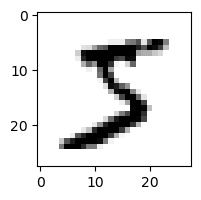

That's a number 5


In [18]:
i = 0
some_digit = X_train.iloc[i]
print(some_digit)
plot_some_digit(some_digit=some_digit)
print('That\'s a number', y_train[i])


In [19]:
import warnings
warnings.filterwarnings('ignore')

prediction = sdg_clf.predict([some_digit])

warnings.filterwarnings('default')

prediction

array([ True])

# Cálculo de Desempenho

Calcular o desempenho de um classificador é mais difícil que calcular o desempenho de um regressor

In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(
    sdg_clf,
    X_train,
    y_train_n,
    cv=3,
    scoring='accuracy' # número de previsões corretas pelo número total de previsões
)

array([0.95035, 0.96035, 0.9604 ])

Mais de 95%. Isso é uma ótima medida de acurácia!

Porém...

Vamos testar um estimador que sempre estime os valores como `False`:

In [21]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [22]:
never_5_clf = Never5Classifier()

cross_val_score(
    never_5_clf,
    X_train,
    y_train_n,
    cv=3,
    scoring='accuracy'
)

array([0.91125, 0.90855, 0.90915])

90% de Acurácia!

Isso significa que aproximadamente 10% do conjunto de dados é de números "5". Ou seja: se você disse que não existe nenhum número "5" no conjunto de dados de treinamento, você estará certo em 90% dos casos.

Conclusão: a Acurácia não é uma boa medida nesse caso. Na verdade, ela comumente não será uma boa métrica para classificadores, ainda mais quando temos dados desbalanceados (90% true para 10% false)

### Matriz de Confusão

Primeiro, vamos resgatar nossas previsões:

In [23]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(
    sdg_clf,
    X_train,
    y_train_n,
    cv=3,
)

In [24]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_n, y_train_pred, labels=sdg_clf.classes_) # [False, True]
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

`labels` define a ordem das classes. Note que nós temos duas classes para validar se é ou não um número "5": `True` e `False`. Nesse caso, a matriz de confusão deve ser interpretada assim:

- **linhas**: real
- **colunas**: previsto (`'pred'`)

```Python
[[ {'pred': False, 'real': False}, {'pred': True, 'real': False} ],
 [ {'pred': False, 'real':  True}, {'pred': True, 'real':  True} ]] 
```

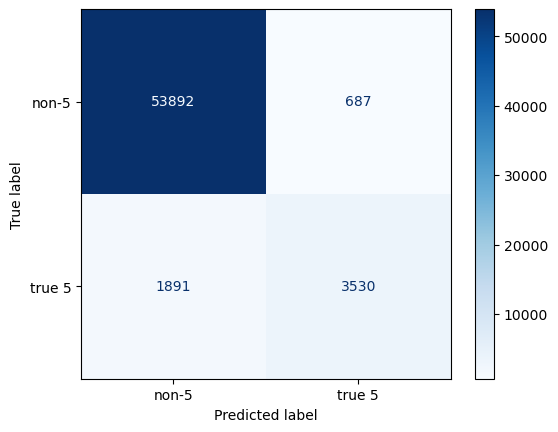

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

labels = ['non-{}'.format(number), 'true {}'.format(number)]

cm_display = ConfusionMatrixDisplay(cm, display_labels=labels)
cm_display.plot(cmap='Blues')
plt.show()

### Precisão e Revocação

**Precisão** é o número de verdadeiros positivos pelo número de instâncias estimadas como positivas:

```
precision = TP / (TP + FP)
```

Ou seja,
> De todos que **eu disse que eram positivo**, quantos realmente eram? 

<hr>

**Revocação** é o número de verdadeiros positivos pelo número de intâncias que eram positivos reais:

```
recall = TP / (TP + FN)
```

Ou seja,
> De todos que **eram positivos de fato**, quantos eu disse que era positivo?

<hr>

Um complementa o outro, porque eu posso ter uma precisão perfeita (100% = 1) se disser que 1 instância é positiva e garantir que realmente é positiva:

```
1 / (1 + 0) = 1/1 = 1
```

Mas o recall seria péssimo (digamos que o número de instâncias seja 100):

```
1 / (1 + 99) = 1/100 = 0.01
```

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_n, y_train_pred)

0.8370879772350012

In [28]:
recall_score(y_train_n, y_train_pred)

0.6511713705958311

### F1 Score

Outra métrica útil é a F1 score, que combina a revocação e a precisão em uma só métrica. Ela é a média harmônica entre as duas métricas anteriores. Por causa disso, valores baixos possuem mais peso. Assim, o F1 socre só será alto se ambas precisão e revocação forem altas:

```
f1 = 2 / (1/precision + 1/recall)
f1 = 2 * (precision * recall) / (precision + recall)
f1 = TP / (TP + (FN + FP) / 2)
```

In [29]:
f1_score(y_train_n, y_train_pred)

0.7325171197343846

### Trade-off precisão/revocação

Quando um aumenta o outro diminui.

Por exemplo, o SGD funciona separando o dataset com um limiar. Quanto menor for esse limiar, mais instâncias que são "5" de fato vão aparecer no estimados como positivo. Isso aumenta o recall.

Ao mesmo tempo, também, mais instâncias que não são verdadeiros "5" vão aparecer, diminuindo assim a precisão.

O oposto também é verdadeiro. Veja o exemplo abaixo, usando o limiar como 0 e como 8000

In [30]:
y_scores_some_digit = sdg_clf.decision_function([some_digit])
y_scores_some_digit

C:\Users\otavi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [31]:
threshold = 0
y_some_digit_pred = (y_scores_some_digit > threshold)
y_some_digit_pred

array([ True])

In [32]:
threshold = 8000
y_some_digit_pred = (y_scores_some_digit > threshold)
y_some_digit_pred

array([False])

Como decidir qual limiar usar? Vamos usar as ferramentas do sklearn a nosso favor

In [33]:
y_scores = cross_val_predict(sdg_clf, X_train, y_train_n, cv=3, method="decision_function")

In [34]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(
    y_train_n,
    y_scores
)

In [35]:
precisions

array([0.09035   , 0.09035151, 0.09035301, ..., 1.        , 1.        ,
       1.        ])

In [36]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [37]:
thresholds

array([-146348.56726174, -142300.00705404, -137588.97581744, ...,
         38871.26391927,   42216.05562787,   49441.43765905])

In [38]:
def plot_precision_vs_recall(y_scores=y_scores, precisions=precisions, recalls=recalls, thresholds=thresholds, highlight_threshold=None):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", )
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
    if highlight_threshold:
        y_train_pred_highlight = (y_scores >= highlight_threshold)
        p = precision_score(y_train_n, y_train_pred_highlight)
        r = recall_score(y_train_n, y_train_pred_highlight)
        
        plt.axvline(highlight_threshold, color="k", linestyle=":", label="Highlight Thresh")
        plt.axhline(p, color="k", linestyle=":")
        plt.axhline(r, color="k", linestyle=":")
        
        plt.plot(highlight_threshold, p, "k.")
        plt.plot(highlight_threshold, r, "k.")
    
    plt.xlabel("Threshold")
    plt.grid(True)
    plt.legend()
    
    plt.show()

Threshold: 8000


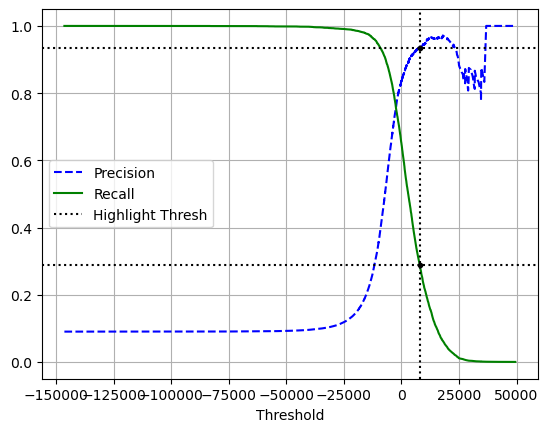

In [39]:
print("Threshold:", threshold)
plot_precision_vs_recall(highlight_threshold = threshold)

É interessante ver duas coisas:

1. A tendência de uma crescer enquanto a outra diminui

2. A precisão pode ter um gráfico irregular, ao passo que a revocação apresenta uma curva suave

O segundo é explicado pelo seguinte: a precisão depende de que os valores estimados como positivo sejam de fato positivos. Mas quando se cresce o limiar, não necessariamente os novos valores que entram no campo de Negativos são Verdadeiros Negativos. Isso pode diminuir a precisão.

Diferentemente, a revocação só tende a crescer à medida que novos valores são classificados como Positivos.

<hr>

Outra forma de avaliar esse _trade-off_ é plotando um gráfico precisão x recall:

In [40]:
def plot_trade_off(y_scores=y_scores, precisions=precisions, recalls=recalls, highlight_threshold=None):
    plt.plot(recalls, precisions)
    
    if highlight_threshold:
        y_train_pred_highlight = (y_scores >= highlight_threshold)
        p = precision_score(y_train_n, y_train_pred_highlight)
        r = recall_score(y_train_n, y_train_pred_highlight)
        
        plt.axhline(p, color="k", linestyle=":")
        plt.axvline(r, color="k", linestyle=":")
        plt.plot(r, p, "k.")
    
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True)
    plt.show()

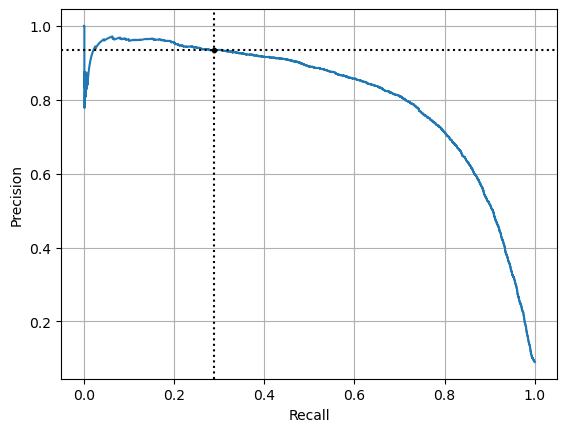

In [41]:
plot_trade_off(highlight_threshold=threshold)

Para escolher o limiar (threshold) ideal, isso depende do seu projeto, ou melhor, do quanto de precisão e recall você precisa. Por exemplo, para achar o melhor recall garantindo 90% de precisão:

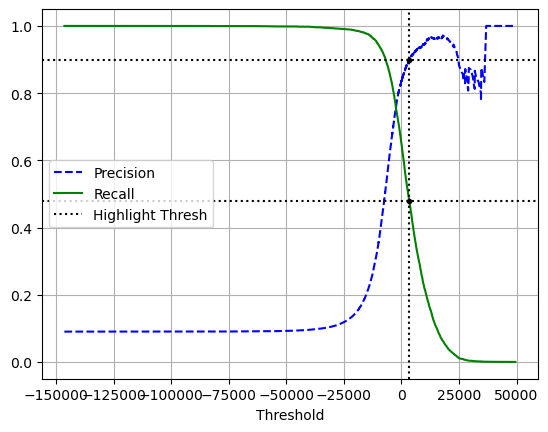

In [42]:
percent = 0.9

threshold_perc_precision = thresholds[np.argmax(precisions >= percent)]

plot_precision_vs_recall(highlight_threshold = threshold_perc_precision)

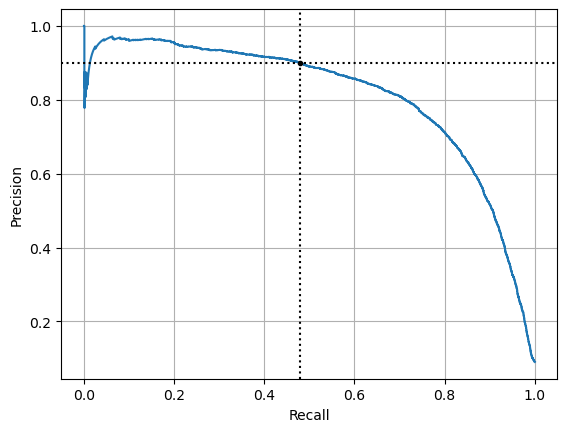

In [43]:
plot_trade_off(highlight_threshold = threshold_perc_precision)

In [44]:
y_train_pred_perc = (y_scores >= threshold_perc_precision)

In [45]:
precision_score(y_train_n, y_train_pred_perc) # garantindo que temos pelo menos 90% de precisão

0.9000345901072293

In [46]:
recall_score(y_train_n, y_train_pred_perc) # verificando qual é o recall nessas condições

0.4799852425751706

### A curva ROC

Essa curva representa a _taxa de verdadeiros positivos_ (revocação, ou TPR) em relação à _taxa de falsos positivos_ (FPR).

Outra métrica relevante é a _taxa de verdadeiros negativos_ (especificidade, ou TNR). Essa métrica é:

```
TNR = 1 - FPR
```

Logo, a curva ROC é a relação entre `TPR` e `1-TNR`, ou `TPR` e `FPR`.

Essa métrica é frequentemente usada para classificadores binários

In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_n, y_scores)

In [48]:
def plot_roc_curve(fpr=fpr, tpr=tpr, thresholds=thresholds, label="SGD"):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0,1], [0,1], 'k:') # diagonal
    plt.grid(True)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.legend()
    plt.show()

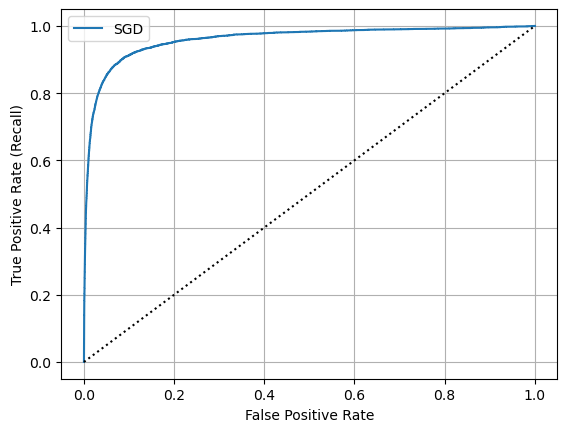

In [49]:
plot_roc_curve()

Aqui existe uma proporção também. Quanto mais o recall aumenta, mais o número de falsos positivos aumenta também.

A linha pontilhada é a curva ROC de um classificador completamente aleatório. Um bom classificador mantém sua curva ROC bem distante dessa diagonal.

<hr>

Uma boa métrica nesses casos é a Área Embaixo da Curva (AUC). A melhor área é igual a 1, enquanto a de um classificador aleatório (linha pontilhada) será de 0.5.

In [50]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_n, y_scores)

0.9604938554008616

> "Via de regra, você deve preferir a curva precisão/revocação (PR) sempre que a **classe positiva for rara** ou quando os falsos positivos forem mais importantes que os falsos negativos. Caso contrário, use a curva ROC." (p. 79)

Vamos testar também um `RandomForestClassifier`

In [51]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

forest_clf

RandomForestClassifier(random_state=42)

O `RandomForestClassifier` não possui um `decision_function`, mas possui um `predict_proba`, que retorna uma linha por instância e uma coluna por classe, dizendo qual é a probabilidade de certa instância pertencer a tal classe (por exemplo, 70% da instância `i` pertencer à classe dos "5")

In [52]:
y_probas_forest = cross_val_predict(
    forest_clf,
    X_train,
    y_train_n,
    cv=3,
    method='predict_proba'
)

y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

Conseguimos então um array de arrays: é um array com as probabilidades de todas as instâncias. Essas probabilidades são separadas num array de duas dimensões: a probabilidade de não ser 5 (`False`) ou de ser um 5 (`True`)

In [53]:
y_score_forest = y_probas_forest[:, 1] # pega apenas as probabilidade da classe positiva

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_n, y_score_forest)

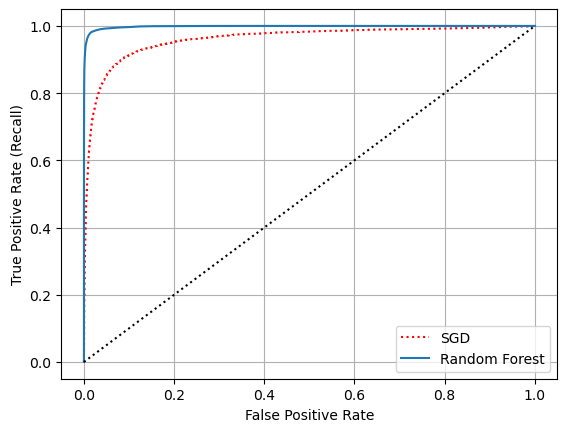

In [54]:
plt.plot(fpr, tpr, "r:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, thresholds_forest, label="Random Forest")

In [55]:
y_bool_forest = y_probas_forest[:, 1] >= 0.5
y_bool_forest
print('precision :', precision_score(y_train_n, y_bool_forest))
print('   recall :', recall_score(y_train_n, y_bool_forest))
print(' f1 score :', f1_score(y_train_n, y_bool_forest))

precision : 0.9897468089558485
   recall : 0.8725327430363402
 f1 score : 0.9274509803921569


# Classificação Multiclasse

Duas estratégias utilizando classificadores binários para classificar múltiplas classes são:

### 1. OvR - One versus the Rest:

Treina um algoritmo para cada número (0 e não-0, 1 e não-1, ..., 9 e não-9) e compara os scores. O maior score ditará a classe da instância.

### 2. OvO - One versus One:

Treina um algoritmo pequeno para cada par de números (0 e 1, 0 e 2, 1 e 2, ...) e compara os scores.

### Scikit-Learn:

Quando a sklearn detecta que você está usando um algoritmo binário para fazer classificação multiclasse, ele aplica automaticamente a estratégia OvO:

In [56]:
from sklearn.svm import SVC

svc_clf = SVC()

In [57]:
svc_clf.fit(X_train, y_train)

SVC()

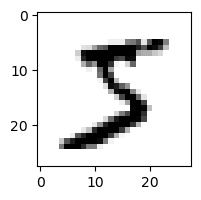

In [59]:
plot_some_digit(some_digit)

In [60]:
svc_clf.predict([some_digit])

C:\Users\otavi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [61]:
some_digit_scores = svc_clf.decision_function([some_digit])
some_digit_scores # um score para cada classe

C:\Users\otavi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [62]:
some_digit_argmax = np.argmax(some_digit_scores)
svc_clf.classes_[some_digit_argmax] # classe do digito

5

Para forçar o sklearn a usar a estratégia OvO ou OvR, use as classes da biblioteca:

```Python
from sklearn.multiclass import OneVersusRestClassifier

ovr_clf = OneVersusRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])
```

## Testando a classificação multiclasse num algoritmo não binário

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [65]:
cross_val_score(
    sdg_clf,
    X_train_scaled,
    y_train,
    cv=3,
    scoring='accuracy'
)

array([0.8983, 0.891 , 0.9018])

# Análise de Erro

In [66]:
y_train_pred = cross_val_predict(
    sdg_clf,
    X_train_scaled,
    y_train,
    cv=3,
)
y_train_pred

array([3, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [67]:
cm = confusion_matrixn_matrix(y_train, y_train_pred)
cm

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

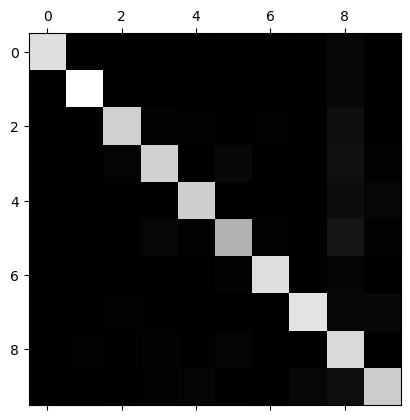

In [82]:
plt.matshow(cm, cmap='gray')
plt.show()